<a href="https://colab.research.google.com/github/FelipeTavares7/data_science_projects/blob/main/Projeto_Prepara%C3%A7%C3%A3o_de_dataset_para_modelagem_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

**Preparação de dataset para modelagem de dados.**

**Contexto do Problema:**
> Uma empresa de e-commerce contratou para levantar os indicadores de recência, frequência e ticket médio (RFM) dos seus clientes.

**Objetivo do Projeto:**
> Gerar métricas RFM para os clientes da empresa de e-commerce, a fim de entender o comportamento de compra e segmentar os clientes com base nesses indicadores.

**Descrição dos Dados:**
> Os dados estão disponíveis em um arquivo CSV fornecido pela empresa. Eles incluem informações sobre as transações dos clientes, como data da compra, valor da compra e identificação do cliente.

**Perguntas de Negócio:**
   - Quais são os clientes mais recentes?
   - Quais são os clientes mais frequentes?
   - Quais são os clientes que gastam mais em média?

**Benefícios Esperados:**
   - Melhor compreensão do comportamento de compra dos clientes.
   - Possibilidade de segmentar os clientes com base nos indicadores RFM para campanhas de marketing direcionadas e estratégias de retenção de clientes.

**Considerações:**
> É importante definir critérios claros para calcular as métricas RFM e determinar a janela de tempo adequada para avaliar a recência das compras.

**Metodologia:**
> Utilizar Python para desenvolver um código que calcule as métricas RFM e gere um output em CSV contendo a identificação do cliente e as métricas RFM.

---



In [ ]:
# Importando as Bibliotecas
import chardet
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Data Understanding

In [ ]:
# Lendo os primeiros bytes do arquivo para determinar o encoding
with open('data.csv', 'rb') as arquivo:
    resultado = chardet.detect(arquivo.read())

# Exibindo o encoding detectado
print('Encoding detectado:', resultado['encoding'])

Encoding detectado: ISO-8859-1


Ao passar o encoding correto ao ler um arquivo CSV com `pd.read_csv()`, garantimos que os caracteres do arquivo sejam decodificados corretamente, evitando erros na leitura dos dados.
A cada leitura do arquivo, antes de detectar e parametrizar o encoding correto, era mostrado um número diferente de linhas. Por isso se fez necessário a realização do código acima.

In [ ]:
# Carregando os Dados
df = pd.read_csv('data.csv', encoding='ISO-8859-1', delimiter=',')



---



## Analises Descritivas

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Visualizando o Dataframe (5 primeiras linhas e as 5 últimas)
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


- O Dataframe possui 541909 linhas e 8 colunas. Sendo as colunas:
  - `InvoiceNo` - Código da fatura;
  - `StockCode` - Código de estoque do produto;
  - `Description` - Descrição do produto;
  - `Quantity` - Quantidade do produto;
  - `InvoiceDate` - Data do faturamento (compra);
  - `UnitPrice` - Preço unitário do produto;
  - `CustomerID` - Código de identificação do cliente;
  - `Country` - País da compra.


---



In [ ]:
# Informações sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Verificando a quantidade de valores nulos em cada coluna
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

- Há dados nulos presentes no conjunto de dados em `Description`(1454) e `CustomerID`(135080);
- As datas estão como `object`.


---



# Data Preparation

## Tratando Dados Nulos

In [ ]:
# Removendo linhas onde CustomerID é nulo
df_sem_nulo = df.dropna(subset=['CustomerID'])

A exclusão das linhas com valores nulos na coluna `CustomerID` é justificada pelo papel fundamental desse código no cálculo das métricas RFM. O `CustomerID` permite associar cada transação a clientes específicos, possibilitando o cálculo preciso da recência, frequência e  ticket médio para cada cliente. Considerando que não há meios confiáveis de preencher os dados faltantes nesta coluna, foram removidas todas as linhas com valores nulos do DataFrame.


---



In [ ]:
# Verificando a quantidade de valores nulos em cada coluna após tratamento
df_sem_nulo.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# Atualizando o DF após retirada dos nulos
df = df_sem_nulo
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## Tratando Quantidades menores que 1

In [ ]:
# Verificando se existe quantidades menores que 1
print('Número de linhas com Quantity menor que 1:\n',(df['Quantity'] < 1).sum(),'linhas')

Número de linhas com Quantity menor que 1:
 8905 linhas


In [ ]:
# Removendo linhas onde 'Quantity' é menor que 1
df_filtrado = df[(df['Quantity'] >= 1)]

# Verificando se existe 'Quantity' menor que 1 após filtro
print('Número de linhas com Quantity menor que 1:\n',(df_filtrado['Quantity'] < 1).sum(),'linhas')

Número de linhas com Quantity menor que 1:
 0 linhas


In [ ]:
# Atualizando o DF após retirada de 'Quantity' menor que 1
df = df_filtrado
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## Tratando Preços Unitários menores ou iguais a 0

Faz sentido manter preços acima de 0 por conta de centavos. Preços zerados ou negativos serão desconsiderados.

In [ ]:
# Verificando se existe Preços Unitários menores que 0
print('Número de linhas com UnitPrice menor ou igual a 0:\n',(df['UnitPrice'] <= 0).sum(),'linhas')

Número de linhas com UnitPrice menor ou igual a 0:
 40 linhas


In [ ]:
# Removendo linhas onde 'UnitPrice' é menor ou igual a 0
df_filtrado = df[(df['UnitPrice'] > 0)]

# Verificando se existe 'UnitPrice' menor ou igual a 0 após filtro
print('Número de linhas com UnitPrice menor ou igual a 0:\n',(df_filtrado['UnitPrice'] <= 0).sum(),'linhas')

Número de linhas com UnitPrice menor ou igual a 0:
 0 linhas


In [ ]:
# Atualizando o DF após retirada de Preços zerados ou negativos
df = df_filtrado
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## Tratando linhas duplicadas

In [ ]:
# Verificando se existe linhas duplicadas, exceto a primeira ocorrência
print('Número de linhas duplicadas: \n', df.duplicated(keep='first').sum(), 'linhas')

Número de linhas duplicadas: 
 5192 linhas


In [ ]:
# Removendo linhas duplicadas mantendo apenas a primeira ocorrência
df_sem_duplicatas = df.drop_duplicates(keep='first')

# Verificando número de linhas duplicadas após filtro
print('Número de linhas duplicadas: \n', df_sem_duplicatas.duplicated(keep='first').sum(), 'linhas')

Número de linhas duplicadas: 
 0 linhas


In [ ]:
# Atualizando o DF após retirada das linhas duplicadas
df = df_sem_duplicatas
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## Corrigindo Tipos de Dados das colunas

In [ ]:
# Verificando Tipos dos dados de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


 Tipo esperado de cada coluna:
  - `InvoiceNo` - object / str ✅
  - `StockCode` - object / str ✅
  - `Description` - object / str ✅
  - `Quantity` - int ✅
  - `InvoiceDate` - datetime ❌
  - `UnitPrice` -  float ✅
  - `CustomerID` - int ❌
  - `Country` - object / str ✅


---



In [ ]:
# Criando uma cópia do DataFrame para evitar o aviso de 'SettingWithCopyWarning'
df_date = df.copy()

# Corrigindo o tipo da coluna 'InvoiceDate'
df_date['InvoiceDate'] = pd.to_datetime(df_date['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Verificando o tipo após conversão
print(df_date['InvoiceDate'].dtypes)

datetime64[ns]


In [ ]:
# Atualizando o DF após correção das datas
df = df_date

In [ ]:
# Corrigindo o tipo da coluna 'CustumerID'
df['CustomerID'] = df['CustomerID'].astype(int)

# Verificando o tipo após conversão
print(df['CustomerID'].dtypes)

int64


In [ ]:
# Verificando Tipos dos dados de cada coluna após conversões
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


 Tipo esperado de cada coluna:
  - `InvoiceNo` - object / str ✅
  - `StockCode` - object / str ✅
  - `Description` - object / str ✅
  - `Quantity` - int ✅
  - `InvoiceDate` - datetime ✅
  - `UnitPrice` -  float ✅
  - `CustomerID` - int ✅
  - `Country` - object / str ✅


---


## Tratando Outliers

Considerado outliers:


*   `Quantity` maior que 10000;
*   `UnitPrice` maior que 5000.



In [ ]:
# Identificando outliers em 'Quantity'
quantity_ol = df[(df['Quantity'] > 10000)]
print('Número de outliers identificados em Quantity:', len(quantity_ol))

# Identificando outliers em 'UnitPrice'
unit_price_ol = df[(df['UnitPrice'] > 5000)]
print('Número de outliers identificados em UnitPrice:', len(unit_price_ol))

Número de outliers identificados em Quantity: 2
Número de outliers identificados em UnitPrice: 1


In [ ]:
# Removendo outliers em 'Quantity'
df = df[df['Quantity'] <= 10000]

# Removendo outliers em 'UnitPrice'
df = df[df['UnitPrice'] <= 5000]

In [ ]:
# Verificando outliers em 'Quantity' após remoção
quantity_ol = df[(df['Quantity'] > 10000)]
print('Número de outliers identificados em Quantity:', len(quantity_ol))

# Verificando outliers em 'UnitPrice' após remoção
unit_price_ol = df[(df['UnitPrice'] > 5000)]
print('Número de outliers identificados em UnitPrice:', len(unit_price_ol))

Número de outliers identificados em Quantity: 0
Número de outliers identificados em UnitPrice: 0


Outliers removidos com sucesso!


---



## Criando coluna de `TotalPrice`

`Quantity` * `UnitPrice`

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


## Calculando última data de compra

In [ ]:
# Calculando a data da última compra
ultima_data = df['InvoiceDate'].max()

# Exibindo a data da última compra
print("Data da última compra:", ultima_data)

Data da última compra: 2011-12-09 12:50:00




---



# Gráficos

## Top 10 países com maior valor em vendas

In [ ]:
# Agrupando os dados por país e calculando o valor total de vendas para cada país
vendas_por_pais = df.groupby('Country')['TotalPrice'].sum().round(2)
vendas_por_pais

Country
Australia                138453.81
Austria                   10198.68
Bahrain                     548.40
Belgium                   41196.34
Brazil                     1143.60
Canada                     3666.38
Channel Islands           20440.54
Cyprus                    13502.85
Czech Republic              826.74
Denmark                   18955.34
EIRE                     265262.46
European Community         1300.25
Finland                   22546.08
France                   208934.31
Germany                  228678.40
Greece                     4760.52
Iceland                    4310.00
Israel                     7215.84
Italy                     17483.24
Japan                     37416.37
Lebanon                    1693.88
Lithuania                  1661.06
Malta                      2725.59
Netherlands              285446.34
Norway                    36165.44
Poland                     7334.65
Portugal                  33375.84
RSA                        1002.31
Saudi Arabia

In [ ]:
# Ordenando os países com base no valor total de vendas em ordem crescente
vendas_por_pais = vendas_por_pais.sort_values(ascending=True)
vendas_por_pais

Country
Saudi Arabia                145.92
Bahrain                     548.40
Czech Republic              826.74
RSA                        1002.31
Brazil                     1143.60
European Community         1300.25
Lithuania                  1661.06
Lebanon                    1693.88
United Arab Emirates       1902.28
Unspecified                2660.77
Malta                      2725.59
USA                        3580.39
Canada                     3666.38
Iceland                    4310.00
Greece                     4760.52
Israel                     7215.84
Poland                     7334.65
Austria                   10198.68
Cyprus                    13502.85
Italy                     17483.24
Denmark                   18955.34
Channel Islands           20440.54
Singapore                 21279.29
Finland                   22546.08
Portugal                  33375.84
Norway                    36165.44
Japan                     37416.37
Sweden                    38367.83
Belgium     

In [ ]:
# Selecionando os top 10 países com maior valor em vendas
top_10_paises = vendas_por_pais.tail(10)
top_10_paises

Country
Sweden              38367.83
Belgium             41196.34
Switzerland         56443.95
Spain               61558.56
Australia          138453.81
France             208934.31
Germany            228678.40
EIRE               265262.46
Netherlands        285446.34
United Kingdom    7031228.69
Name: TotalPrice, dtype: float64

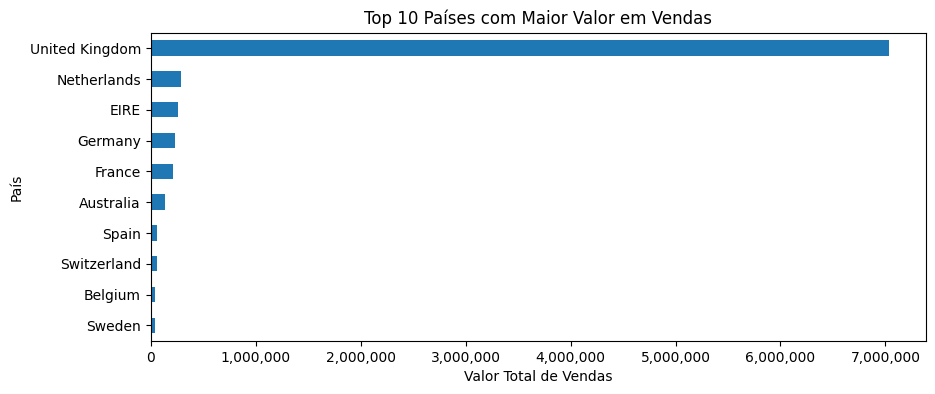

In [ ]:
# Plotando o gráfico com barras horizontais
plt.figure(figsize=(10, 4))
top_10_paises.plot(kind='barh')
plt.title('Top 10 Países com Maior Valor em Vendas')
plt.xlabel('Valor Total de Vendas')
plt.ylabel('País')

# Definindo o formato dos rótulos do eixo x para exibir valores completos
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.show()

## Top 10 produtos mais vendidos

In [ ]:
# Agrupando os dados por produto e calculando a quantidade total vendida de cada produto
vendas_por_produto = df.groupby('Description')['Quantity'].sum()
vendas_por_produto

Description
 4 PURPLE FLOCK DINNER CANDLES       138
 50'S CHRISTMAS GIFT BAG LARGE      1885
 DOLLY GIRL BEAKER                  2394
 I LOVE LONDON MINI BACKPACK         359
 I LOVE LONDON MINI RUCKSACK           1
                                    ... 
ZINC T-LIGHT HOLDER STARS SMALL     4894
ZINC TOP  2 DOOR WOODEN SHELF         10
ZINC WILLIE WINKIE  CANDLE STICK    2606
ZINC WIRE KITCHEN ORGANISER           25
ZINC WIRE SWEETHEART LETTER TRAY      80
Name: Quantity, Length: 3876, dtype: int64

In [ ]:
# Ordenando os produtos com base na quantidade total vendida em ordem crescente
vendas_por_produto = vendas_por_produto.sort_values(ascending=True)
vendas_por_produto

Description
BLOSSOM IMAGES SCRAP BOOK SET             1
PACK 4 FLOWER/BUTTERFLY PATCHES           1
BLACK DROP EARRINGS W LONG BEADS          1
VINTAGE BEAD PINK JEWEL STAND             1
SET/3 FLORAL GARDEN TOOLS IN BAG          1
                                      ...  
PACK OF 72 RETROSPOT CAKE CASES       33670
ASSORTED COLOUR BIRD ORNAMENT         35263
WHITE HANGING HEART T-LIGHT HOLDER    36706
JUMBO BAG RED RETROSPOT               46078
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
Name: Quantity, Length: 3876, dtype: int64

In [ ]:
# Selecionando os top 10 produtos mais vendidos
top_10_produtos = vendas_por_produto.tail(10)

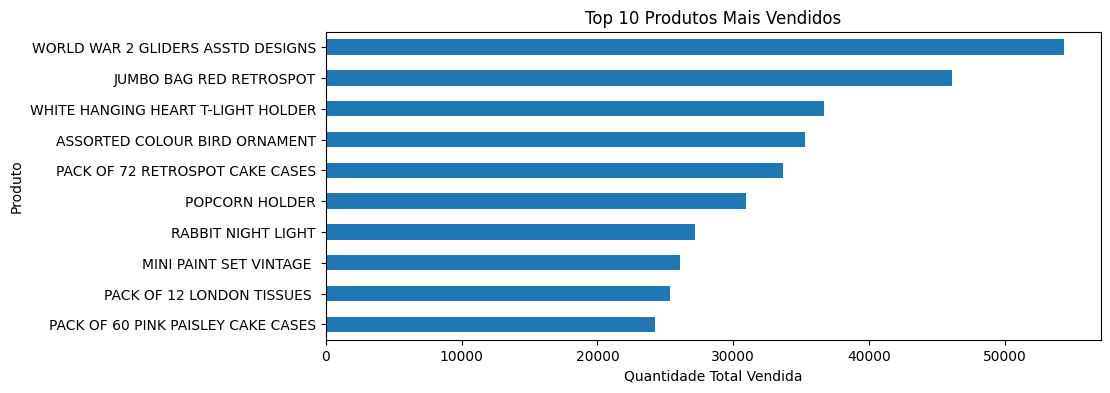

In [ ]:
# Plotar o gráfico com barras laterais
plt.figure(figsize=(10, 4))
top_10_produtos.plot(kind='barh')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Quantidade Total Vendida')
plt.ylabel('Produto')
plt.show()

## Valor de venda total por mês

In [ ]:
# Extrair o mês de cada data na coluna 'InvoiceDate'
df['Month'] = df['InvoiceDate'].dt.month

In [ ]:
# Calcular o valor total de vendas por mês
vendas_por_mes = df.groupby('Month')['TotalPrice'].sum().round(2)
vendas_por_mes

Month
1      490917.71
2      446084.92
3      594081.76
4      468374.33
5      669212.40
6      660046.05
7      598962.90
8      644051.04
9      950690.20
10    1035642.45
11    1156205.61
12     919143.57
Name: TotalPrice, dtype: float64

In [ ]:
# Encontrando o mês com o valor máximo e mínimo de vendas
mes_max = vendas_por_mes.idxmax()
print('Mês com maior valor em vandas:',mes_max)

mes_min = vendas_por_mes.idxmin()
print('Mês com menor valor em vandas:',mes_min)

Mês com maior valor em vandas: 11
Mês com menor valor em vandas: 2


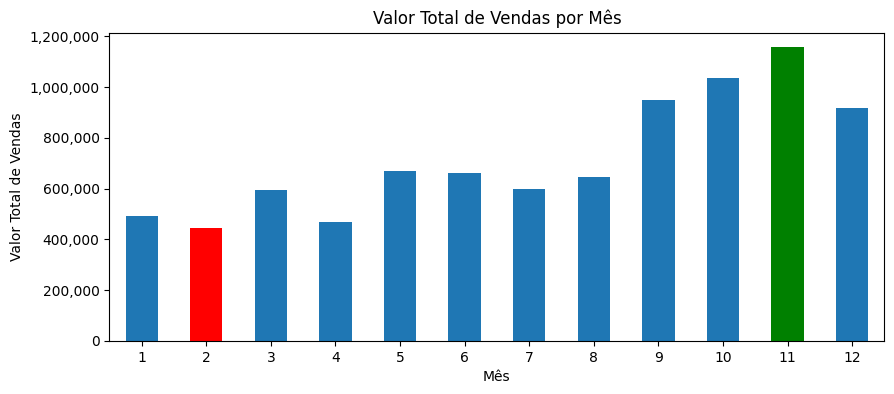

In [ ]:
# Plotando o gráfico
plt.figure(figsize=(10, 4))
vendas_por_mes.plot(kind='bar')

# Destacando o mês com maior valor de vendas
plt.bar(mes_max -1, vendas_por_mes[mes_max], width=0.5, color='green')

# Destacando o mês com menor valor de vendas
plt.bar(mes_min -1, vendas_por_mes[mes_min], width=0.5, color='red')

plt.title('Valor Total de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Total de Vendas')
plt.xticks(rotation=0)

# Definindo o formato dos rótulos do eixo y para exibir valores completos
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.show()

## Valor de venda total por mês e por país

In [ ]:
# Filtrando os dados para incluir apenas os top 10 países
df_top_10_paises = df[df['Country'].isin(top_10_paises.index)]
df_top_10_paises

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12


In [ ]:
# Calculando o valor total de vendas por mês e por país
vendas_por_mes_pais = df_top_10_paises.groupby(['Month', 'Country'])['TotalPrice'].sum().unstack()
vendas_por_mes_pais

Country,Australia,Belgium,EIRE,France,Germany,Netherlands,Spain,Sweden,Switzerland,United Kingdom
Month,,,,,,,,,,
1,9017.71,1200.20,21904.19,17740.12,16880.84,26611.16,10086.09,3486.32,4231.23,363692.730
2,14695.42,2181.07,10111.52,8515.96,9581.05,23011.91,2114.50,509.50,2654.92,354618.200
3,17223.99,3351.98,21674.36,14584.95,14392.69,22416.49,5363.15,4720.58,1870.23,465784.190
4,771.60,1989.48,7570.50,5529.61,12315.54,2976.56,1785.65,809.10,2076.94,408733.111
5,13638.41,2732.40,15977.15,17606.48,25734.70,29185.88,3257.60,2681.98,3610.01,542216.600
6,25187.77,4274.82,19835.99,16078.97,13246.35,26858.09,3333.21,832.00,7904.15,523775.590
7,4964.38,2475.57,40854.15,10000.19,16440.98,26.02,7620.77,6802.09,3762.65,484545.591
8,22489.20,3554.02,16957.83,13810.96,19220.77,40327.81,3342.41,1390.36,4969.89,497194.910
9,5106.73,4208.02,40832.64,23428.04,18079.47,26937.26,5189.24,4575.21,8284.86,794806.692


<Figure size 1000x400 with 0 Axes>

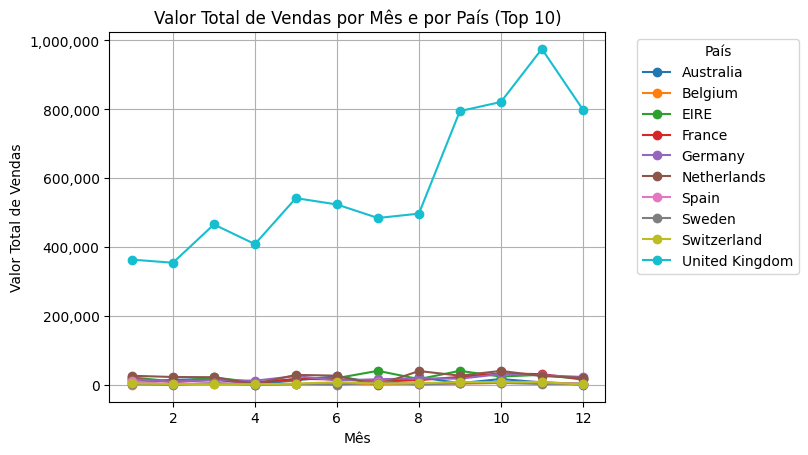

In [ ]:
# Plotando o gráfico
plt.figure(figsize=(10, 4))
vendas_por_mes_pais.plot(kind='line', marker='o')
plt.title('Valor Total de Vendas por Mês e por País (Top 10)')
plt.xlabel('Mês')
plt.ylabel('Valor Total de Vendas')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Definindo o formato dos rótulos do eixo y para exibir valores completos
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.show();



---



# Cálculo do RFM


- **R** é a recência, diferença em dias da última compra do cliente e da última
compra disponível no conjunto de dados;
- **F** é a frequência, ou seja, a quantidade de compras feitas pelo cliente;
- **M** é o ticket médio, ou seja, a média das compras feitas pelo cliente.

In [ ]:
# Agrupando os dados por cliente e pedido para obter a data e o preço total do pedido
agg_cliente_pedido = df.groupby(['CustomerID', 'InvoiceNo']).agg({
    'InvoiceDate': 'max',
    'TotalPrice': 'sum'
})

In [ ]:
# Calculando a recência (R)
ultima_data_compra = df['InvoiceDate'].max()
agg_cliente = agg_cliente_pedido.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (ultima_data_compra - date.max()).days,
    'TotalPrice': lambda price: round(price.mean(), 2)   # Calculando o valor médio das compras (M) com 2 casas decimais
})

In [ ]:
#  Calculando a frequência (F)
freq_cliente = df.groupby('CustomerID')['InvoiceNo'].nunique()
agg_cliente['Frequência(F)'] = freq_cliente

In [ ]:
# Renomeando as colunas para RFM
agg_cliente.rename(columns={
    'InvoiceDate': 'Recência(R)',
    'TotalPrice': 'Ticket_Médio(M)'
}, inplace=True)

In [ ]:
# Reordenando as colunas para exibir na ordem RFM
agg_cliente = agg_cliente[['Recência(R)', 'Frequência(F)', 'Ticket_Médio(M)']]

# Visualizando o resultado
display(agg_cliente)

,Recência(R),Frequência(F),Ticket_Médio(M)
CustomerID,,,
12347,1,7,615.71
12348,74,4,449.31
12349,18,1,1757.55
12350,309,1,334.40
12352,35,8,313.26
...,...,...,...
18280,277,1,180.60
18281,180,1,80.82
18282,7,2,89.02


**Perguntas de Negócio:**
   - Quais são os clientes mais recentes?
   - Quais são os clientes mais frequentes?
   - Quais são os clientes que gastam mais em média?

In [ ]:
# Visualizando os top 5 clientes mais recentes
top5_rec = agg_cliente.sort_values(by='Recência(R)', ascending=False).head(5)
print("Top 5 clientes mais recentes:")
print(top5_rec)

# Visualizando os top 5 clientes mais frequentes
top5_freq = agg_cliente.sort_values(by='Frequência(F)', ascending=False).head(5)
print("\nTop 5 clientes mais frequentes:")
print(top5_freq)

# Visualizando os top 5 clientes que gastam mais em média
top5_tm = agg_cliente.sort_values(by='Ticket_Médio(M)', ascending=False).head(5)
print("\nTop 5 clientes que gastam mais em média:")
print(top5_tm)


Top 5 clientes mais recentes:
            Recência(R)  Frequência(F)  Ticket_Médio(M)
CustomerID                                             
18074               373              1           489.60
12791               373              1           192.60
17968               373              1           265.10
16583               373              1           233.45
14729               373              1           313.49

Top 5 clientes mais frequentes:
            Recência(R)  Frequência(F)  Ticket_Médio(M)
CustomerID                                             
12748                 0            209           158.15
14911                 0            201           714.98
17841                 1            124           326.77
13089                 2             97           605.79
14606                 0             93           129.85

Top 5 clientes que gastam mais em média:
            Recência(R)  Frequência(F)  Ticket_Médio(M)
CustomerID                                             